In [1]:
# Get the data for expeirment
import sklearn
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams.update({'font.size': 20})

In [4]:
# Read the data set
df = pd.read_csv('Data/FES/Raw/T1.csv', header=0)

In [5]:
# The weather sensor data should be the input data
print(len(df))
df

50530


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [6]:
# Check all columns, some are not instantly understandable
df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [7]:
column_to_use = [
   'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'
]

In [18]:
# No null values
print(df.isnull().sum())

df_processed = df[column_to_use]

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64


In [19]:
# There are a few 57 records with negative power generation, remove those records
df_processed = df_processed.loc[df_processed['LV ActivePower (kW)']>=0]

In [20]:
len(df_processed)

50473

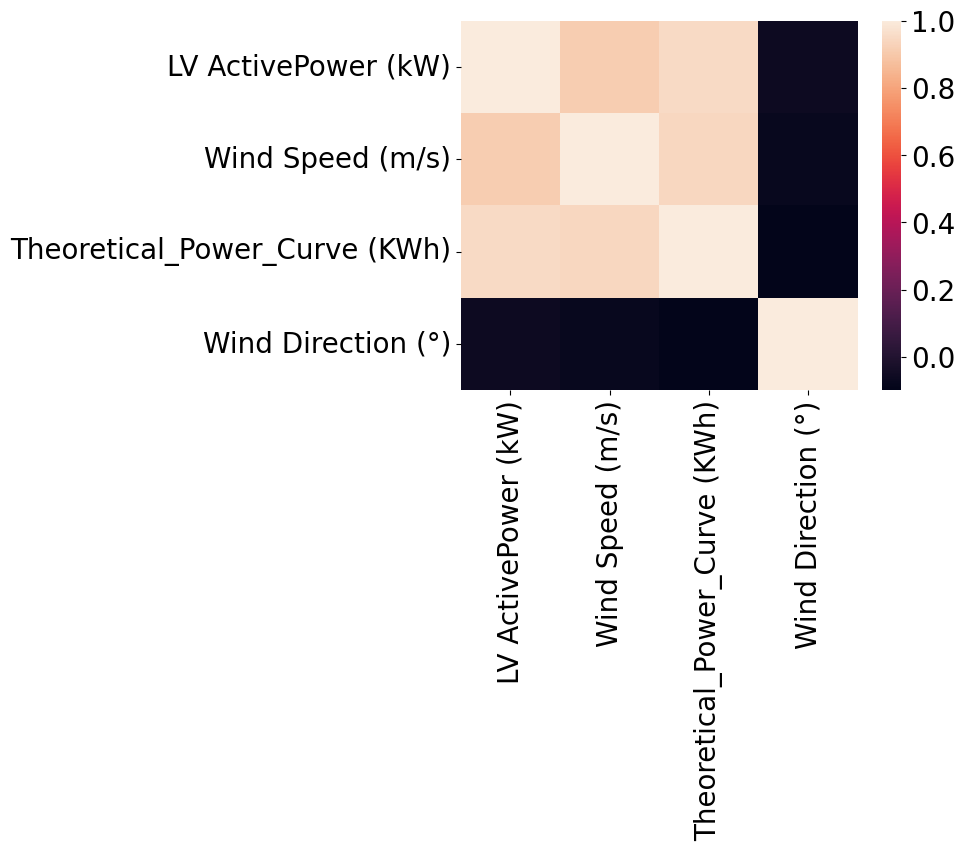

In [4]:
_ = sns.heatmap(data.corr())

In [21]:
df_processed.to_csv('Data\FES\processed_scada_wind_turbine.csv', sep = ',', index = False)

In [3]:
# Read the processeed data
data = pd.read_csv('Data/FES/processed_scada_wind_turbine.csv')

x = data.drop(columns=['LV ActivePower (kW)'])
y = data['LV ActivePower (kW)']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [24]:
x_train.to_csv('Data/FES/scada_wind_turbine_x_train.csv', sep = ',', index = False)
x_test.to_csv('Data/FES/scada_wind_turbine_x_test.csv', sep = ',', index = False)
y_train.to_csv('Data/FES/scada_wind_turbine_y_train.csv', sep = ',', index = False)
y_test.to_csv('Data/FES/scada_wind_turbine_y_test.csv', sep = ',', index = False)